### Unattended Luggage Detection

#### Load Modules

In [1]:
# LOAD MODULES
# Import Modules
import pickle
import os
import pickle
import math
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import find_peaks_cwt
import random
import glob
import time
import tensorflow as tf
from sklearn.utils import shuffle
import csv
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage as ndi
from skimage.feature import blob_doh
from skimage.feature import peak_local_max
from skimage.morphology import watershed,disk
from skimage.filters import rank
from skimage.filters import gaussian_filter
from skimage.util import img_as_ubyte
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.cross_validation import train_test_split
from scipy.ndimage.measurements import label
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

print('Importing Modules')

Importing Modules


/home/umer/Anaconda/envs/Udacity-Self-Driving-Car-II/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Load Model

In [2]:
# LOAD MODEL
# Setup Paths
ModelPath='/home/umer/Documents/Machine-Learning/Codes/Models'

# Set Path to frozen detection graph. This is the Actual Model that is used for the Object Detection.
ModelName='ssd_mobilenet_v1_coco_11_06_2017'
PathModel=os.path.join(ModelPath,'object_detection',ModelName,'frozen_inference_graph.pb')

# List of the Strings that is used to add correct Label for each Box.
PathLabel=os.path.join(ModelPath,'object_detection','data','mscoco_label_map.pbtxt')

In [3]:
# LOAD MODEL
# Set Number of Classes in Model
NumClasses=90

# Loading Label Map
LabelMap=label_map_util.load_labelmap(PathLabel)
Categories=label_map_util.convert_label_map_to_categories(LabelMap,
                                                          max_num_classes=NumClasses,
                                                          use_display_name=True)
CategoryIndex=label_map_util.create_category_index(Categories)

#### Object Detection

In [4]:
# OBJECT DETECTION
# Write a Function to Detect Objects
def DetectObjects(ImageNP,Sess,DetectionGraph):
    # Expand Dimensions since the Model expects Images to have shape:[1,None,None,3]
    ImageNPExpanded=np.expand_dims(ImageNP,axis=0)
    ImageTensor=DetectionGraph.get_tensor_by_name('image_tensor:0')

    # Each Box represents a part of the Image where a particular Object was detected.
    Boxes=DetectionGraph.get_tensor_by_name('detection_boxes:0')

    # Each Score represent how Level of Confidence for each of the Objects.
    # Score is shown on the Result Image, together with the Class Label.
    Scores=DetectionGraph.get_tensor_by_name('detection_scores:0')
    Classes=DetectionGraph.get_tensor_by_name('detection_classes:0')
    NumDetections=DetectionGraph.get_tensor_by_name('num_detections:0')

    # Actual Detection.
    (Boxes,Scores,Classes,NumDetections)=Sess.run(
        [Boxes,Scores,Classes,NumDetections],
        feed_dict={ImageTensor:ImageNPExpanded})

    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        ImageNP,
        np.squeeze(Boxes),
        np.squeeze(Classes).astype(np.int32),
        np.squeeze(Scores),
        CategoryIndex,
        use_normalized_coordinates=True,
        line_thickness=8)
    return ImageNP

In [8]:
# OBJECT DETECTION
# Set Paths to Test Images
PathTestImagesFolder='/home/umer/Documents/Machine-Learning/Codes/Object-Detection/Test-Images'
PathTestImages=[os.path.join(PathTestImagesFolder,'test{}.jpg'.format(i)) for i in range(1,8)]

In [9]:
# OBJECT DETECTION
# Write a Function to Convert Image into Numpy Array
def LoadImageNumpyArray(Image):
  (ImageWidth,ImageHeight)=Image.size
  return np.array(Image.getdata()).reshape((int(ImageHeight),int(ImageWidth),3)).astype(np.uint8)

In [10]:
# OBJECT DETECTION
# Load Test Images
from PIL import Image
for ImagePath in PathTestImages:
    ImageOrig=Image.open(ImagePath)
    ImageNP=LoadImageNumpyArray(ImageOrig)

In [11]:
# OBJECT DETECTION
# Load a Frozen TF Model 
DetectionGraph=tf.Graph()
with DetectionGraph.as_default():
    OdGraphDef=tf.GraphDef()
    with tf.gfile.GFile(PathModel,'rb') as fid:
        SerializedGraph=fid.read()
        OdGraphDef.ParseFromString(SerializedGraph)
        tf.import_graph_def(OdGraphDef,name='')

Time Taken:  2.8681409999999996
Image Shape:  (180, 320, 3)
Time Taken:  0.33266699999999894
Image Shape:  (180, 320, 3)
Time Taken:  0.34815099999999966
Image Shape:  (180, 320, 3)
Time Taken:  0.34655200000000086
Image Shape:  (180, 320, 3)
Time Taken:  0.35740000000000016
Image Shape:  (180, 320, 3)
Time Taken:  0.3486369999999983
Image Shape:  (180, 320, 3)
Time Taken:  0.35136599999999873
Image Shape:  (180, 320, 3)


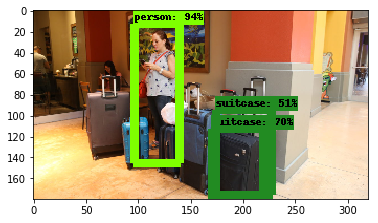

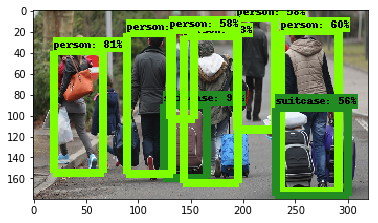

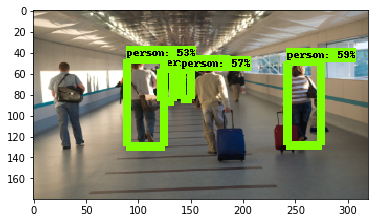

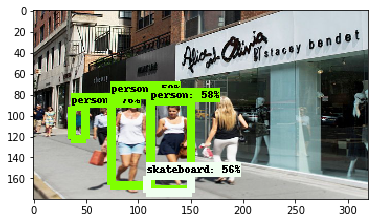

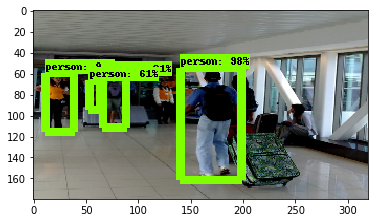

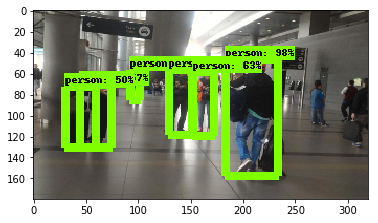

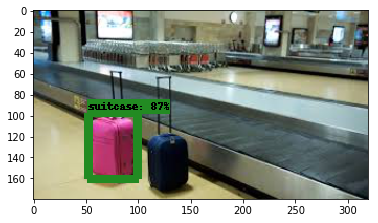

In [12]:
# OBJECT DETECTION
with DetectionGraph.as_default():
    with tf.Session(graph=DetectionGraph) as sess:
        for ImagePath in PathTestImages:
            ImageOrig=Image.open(ImagePath)
            ImageNP=LoadImageNumpyArray(ImageOrig)
            ImageNP=cv2.resize(ImageNP,(320,180)) 
            StartTime=time.clock()
            ImageProcess=DetectObjects(ImageNP,sess,DetectionGraph)
            EndTime=time.clock()
            print("Time Taken: ",EndTime-StartTime)
            print("Image Shape: ",ImageProcess.shape)
            plt.figure(figsize=(6,4))
            plt.imshow(ImageProcess)      